In [1]:
# Table 1 -   Survive and Not-survive

In [2]:
# libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
# reading dataset

df = pd.read_csv('/home/pedro/Desktop/autoprognosis/datasets/INFLUD-16-06-2020-Revisado.csv',sep=';',encoding = "ISO-8859-1")

# Inputing constraint in the dataset 

# Positive case:

df = df[df['PCR_SARS2']==1]
print(df.shape)


# Hospitalized people:

df = df[df['PCR_SARS2']==1][df['HOSPITAL']==1]
print(df.shape)

# Hospitalized people with age small than 110:

df = df[df['PCR_SARS2']==1][df['HOSPITAL']==1][df['NU_IDADE_N']<=110][df['EVOLUCAO'] != 9][df['EVOLUCAO'].notnull()]
print(df.shape)


/home/pedro/anaconda3/envs/python36env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (18,59,61,62,63,103,105,119,126,128,129,130,132) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(97924, 134)
(90133, 134)


/home/pedro/anaconda3/envs/python36env/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


(66929, 134)


In [4]:
# IDHM

# Reading IBGE code for each municipalities and separating it for IDHM index

df_atlas = pd.read_excel (r'/home/pedro/Desktop/goias/AtlasBrasil_Consulta.xlsx')


# removind last interger in 'code' variable

df_atlas['code'] = df_atlas['code'].astype(str).str[:-1].astype(np.int64)


# Divinding IDHM in bins

IDHM_veryhigh  =  set(df_atlas['code'][df_atlas['IDHM2010']>=0.800])
print(len(IDHM_veryhigh))


IDHM_high  =  set(df_atlas['code'][((df_atlas['IDHM2010']>=0.700)&(df_atlas['IDHM2010']<0.800))])
print(len(IDHM_high))


IDHM_medium_low  =  set(df_atlas['code'][df_atlas['IDHM2010']<0.700])
print(len(IDHM_medium_low))



df.loc[df['CO_MUN_NOT'].isin(IDHM_veryhigh) == True, 'IDHM'] = 3
df.loc[df['CO_MUN_NOT'].isin(IDHM_high) == True, 'IDHM'] = 2
df.loc[df['CO_MUN_NOT'].isin(IDHM_medium_low) == True, 'IDHM'] = 1


# Municipalities number analysed
print(df['IDHM'].isnull().sum())


44
1890
3632
1


In [5]:
# Private and public hospital separation

df_hospital = pd.read_csv('/home/pedro/Desktop/autoprognosis/Archive-SUS/CNES_SUS.txt', sep='\t')


public   =  set(df_hospital.iloc[:,0][df_hospital.iloc[:,3]=='S'])
private  =  set(df_hospital.iloc[:,0][df_hospital.iloc[:,3]=='N'])


df.loc[df['CO_UNI_NOT'].isin(public) == True, 'HEALTH_SYSTEM'] = 1
df.loc[df['CO_UNI_NOT'].isin(private) == True, 'HEALTH_SYSTEM'] = 0

In [6]:
# Constraint on dataset: We only analyze people with  evolution, IDHM and Health system known

df = df[df['IDHM'].notnull()][(df['HEALTH_SYSTEM']==1)|(df['HEALTH_SYSTEM']==0)]
print(df.shape)


(63860, 136)


/home/pedro/anaconda3/envs/python36env/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
# Number Municipalities 


# ??

In [8]:
# Evolution numbers

print(df['EVOLUCAO'].value_counts())
print(100*df['EVOLUCAO'][df['EVOLUCAO'] != 9].value_counts()/df['EVOLUCAO'][df['EVOLUCAO'] != 9].notnull().sum())
print(df['EVOLUCAO'].isna().sum())

1.0    35245
2.0    28615
Name: EVOLUCAO, dtype: int64
1.0    55.191043
2.0    44.808957
Name: EVOLUCAO, dtype: float64
0


In [9]:
# Health System division 

print(df['HEALTH_SYSTEM'].value_counts())
print(df['HEALTH_SYSTEM'].shape)

1.0    48155
0.0    15705
Name: HEALTH_SYSTEM, dtype: int64
(63860,)


In [10]:
# Public Health System (Hospital)

print(df['EVOLUCAO'][((df['HEALTH_SYSTEM'] ==1 ) & (df['EVOLUCAO'] != 9))].notnull().sum())
print(df['EVOLUCAO'][((df['HEALTH_SYSTEM'] ==1 ) & (df['EVOLUCAO'] != 9))].value_counts())


print(100*df['EVOLUCAO'][((df['HEALTH_SYSTEM'] ==1) & (df['EVOLUCAO'] != 9))].value_counts()/df['EVOLUCAO'][((df['HEALTH_SYSTEM'] == 1) & (df['EVOLUCAO'] != 9))].notnull().sum() )


48155
1.0    24549
2.0    23606
Name: EVOLUCAO, dtype: int64
1.0    50.97913
2.0    49.02087
Name: EVOLUCAO, dtype: float64


In [11]:
# Private Health System (Hospital)

print(df['EVOLUCAO'][((df['HEALTH_SYSTEM'] ==0 ) & (df['EVOLUCAO'] != 9))].notnull().sum())
print(df['EVOLUCAO'][((df['HEALTH_SYSTEM'] ==0 ) & (df['EVOLUCAO'] != 9))].value_counts())


print(100*df['EVOLUCAO'][((df['HEALTH_SYSTEM'] ==0) & (df['EVOLUCAO'] != 9))].value_counts()/df['EVOLUCAO'][((df['HEALTH_SYSTEM'] == 0) & (df['EVOLUCAO'] != 9))].notnull().sum() )


15705
1.0    10696
2.0     5009
Name: EVOLUCAO, dtype: int64
1.0    68.105699
2.0    31.894301
Name: EVOLUCAO, dtype: float64


In [12]:
# Public Health System (ICU)

print(df['EVOLUCAO'][((df['HEALTH_SYSTEM'] ==1)& (df['UTI'] ==1) & (df['EVOLUCAO'] != 9))].notnull().sum())
print(df['EVOLUCAO'][((df['HEALTH_SYSTEM'] ==1)& (df['UTI'] ==1) & (df['EVOLUCAO'] != 9))].value_counts())


print(100*df['EVOLUCAO'][((df['HEALTH_SYSTEM'] ==1)& (df['UTI'] ==1) & (df['EVOLUCAO'] != 9))].value_counts()/df['EVOLUCAO'][((df['HEALTH_SYSTEM'] == 1)& (df['UTI'] ==1) & (df['EVOLUCAO'] != 9))].notnull().sum() )


15288
2.0    10834
1.0     4454
Name: EVOLUCAO, dtype: int64
2.0    70.866039
1.0    29.133961
Name: EVOLUCAO, dtype: float64


In [13]:
# Private Health System (ICU)

print(df['EVOLUCAO'][((df['HEALTH_SYSTEM'] ==0)& (df['UTI'] ==1)& (df['EVOLUCAO'] != 9))].notnull().sum())
print(df['EVOLUCAO'][((df['HEALTH_SYSTEM'] ==0)& (df['UTI'] ==1) & (df['EVOLUCAO'] != 9))].value_counts())


print(100*df['EVOLUCAO'][((df['HEALTH_SYSTEM'] ==0)& (df['UTI'] ==1) & (df['EVOLUCAO'] != 9))].value_counts()/df['EVOLUCAO'][((df['HEALTH_SYSTEM'] == 0)& (df['UTI'] ==1) & (df['EVOLUCAO'] != 9))].notnull().sum() )



6649
2.0    3356
1.0    3293
Name: EVOLUCAO, dtype: int64
2.0    50.473755
1.0    49.526245
Name: EVOLUCAO, dtype: float64


In [14]:
# IDHM Very High

print(df['EVOLUCAO'][((df['IDHM'] ==3) & (df['EVOLUCAO'] != 9))].notnull().sum())
print(df['EVOLUCAO'][((df['IDHM'] ==3) & (df['EVOLUCAO'] != 9))].value_counts())


print(100*df['EVOLUCAO'][((df['IDHM'] ==3) & (df['EVOLUCAO'] != 9))].value_counts()/df['EVOLUCAO'][((df['IDHM'] == 3) & (df['EVOLUCAO'] != 9))].notnull().sum() )


26645
1.0    18021
2.0     8624
Name: EVOLUCAO, dtype: int64
1.0    67.633702
2.0    32.366298
Name: EVOLUCAO, dtype: float64


In [15]:
# IDHM High

print(df['EVOLUCAO'][((df['IDHM'] ==2) & (df['EVOLUCAO'] != 9))].notnull().sum())
print(df['EVOLUCAO'][((df['IDHM'] ==2) & (df['EVOLUCAO'] != 9))].value_counts())


print(100*df['EVOLUCAO'][((df['IDHM'] ==2) & (df['EVOLUCAO'] != 9))].value_counts()/df['EVOLUCAO'][((df['IDHM'] == 2) & (df['EVOLUCAO'] != 9))].notnull().sum() )


33269
2.0    17612
1.0    15657
Name: EVOLUCAO, dtype: int64
2.0    52.938171
1.0    47.061829
Name: EVOLUCAO, dtype: float64


In [16]:
# IDHM Medium_low

print(df['EVOLUCAO'][((df['IDHM'] ==1) & (df['EVOLUCAO'] != 9))].notnull().sum())
print(df['EVOLUCAO'][((df['IDHM'] ==1) & (df['EVOLUCAO'] != 9))].value_counts())


print(100*df['EVOLUCAO'][((df['IDHM'] ==1) & (df['EVOLUCAO'] != 9))].value_counts()/df['EVOLUCAO'][((df['IDHM'] == 1) & (df['EVOLUCAO'] != 9))].notnull().sum() )


3946
2.0    2379
1.0    1567
Name: EVOLUCAO, dtype: int64
2.0    60.2889
1.0    39.7111
Name: EVOLUCAO, dtype: float64


In [17]:
# mean age

#Cured people
print(df['NU_IDADE_N'][df['EVOLUCAO']==1].mean())

# Died people
print(df['NU_IDADE_N'][df['EVOLUCAO']==2].mean())

52.67235068804086
67.55526821597064


In [18]:
# std age

#Cured people
print(df['NU_IDADE_N'][df['EVOLUCAO']==1].std())

# Died people
print(df['NU_IDADE_N'][df['EVOLUCAO']==2].std())

17.354339162894423
16.026351255154452


In [19]:
# Female

print(df['EVOLUCAO'][((df['CS_SEXO'] == 'F') & (df['EVOLUCAO'] != 9))].value_counts())
print(df['EVOLUCAO'][((df['CS_SEXO'] == 'F') & (df['EVOLUCAO'] != 9))].notnull().sum())

print(100*df['EVOLUCAO'][((df['CS_SEXO'] == 'F') & (df['EVOLUCAO'] != 9))].value_counts()/df['EVOLUCAO'][((df['CS_SEXO'] == 'F') & (df['EVOLUCAO'] != 9))].notnull().sum())

# 1- Cured  2- Died

1.0    15261
2.0    11841
Name: EVOLUCAO, dtype: int64
27102
1.0    56.309497
2.0    43.690503
Name: EVOLUCAO, dtype: float64


In [20]:
# Male

print(df['EVOLUCAO'][((df['CS_SEXO'] == 'M') & (df['EVOLUCAO'] != 9))].value_counts())
print(df['EVOLUCAO'][((df['CS_SEXO'] == 'M') & (df['EVOLUCAO'] != 9))].notnull().sum())

print(100*df['EVOLUCAO'][((df['CS_SEXO'] == 'M') & (df['EVOLUCAO'] != 9))].value_counts()/df['EVOLUCAO'][((df['CS_SEXO'] == 'M') & (df['EVOLUCAO'] != 9))].notnull().sum())

# 1- Cured  2- Died

1.0    19974
2.0    16766
Name: EVOLUCAO, dtype: int64
36740
1.0    54.365814
2.0    45.634186
Name: EVOLUCAO, dtype: float64


In [21]:
# Color
 
# Branca, Preta, Amarela, Parda and Indígena

In [22]:

# Branca

print(df['EVOLUCAO'][((df['CS_RACA'] == 1) & (df['EVOLUCAO'] != 9))].value_counts())
print(df['EVOLUCAO'][((df['CS_RACA'] == 1) & (df['EVOLUCAO'] != 9))].notnull().sum())

print(100*df['EVOLUCAO'][((df['CS_RACA'] == 1) & (df['EVOLUCAO'] != 9))].value_counts()/df['EVOLUCAO'][((df['CS_RACA'] == 1) & (df['EVOLUCAO'] != 9))].notnull().sum())


# 1- Cured  2- Died (Evolution)

1.0    12149
2.0     7643
Name: EVOLUCAO, dtype: int64
19792
1.0    61.383387
2.0    38.616613
Name: EVOLUCAO, dtype: float64


In [23]:
# Preta

print(df['EVOLUCAO'][((df['CS_RACA'] == 2) & (df['EVOLUCAO'] != 9))].value_counts())
print(df['EVOLUCAO'][((df['CS_RACA'] == 2) & (df['EVOLUCAO'] != 9))].notnull().sum())

print(100*df['EVOLUCAO'][((df['CS_RACA'] == 2) & (df['EVOLUCAO'] != 9))].value_counts()/df['EVOLUCAO'][((df['CS_RACA'] == 2) & (df['EVOLUCAO'] != 9))].notnull().sum())


1.0    1554
2.0    1454
Name: EVOLUCAO, dtype: int64
3008
1.0    51.662234
2.0    48.337766
Name: EVOLUCAO, dtype: float64


In [24]:
# Amarela

print(df['EVOLUCAO'][((df['CS_RACA'] == 3) & (df['EVOLUCAO'] != 9))].value_counts())
print(df['EVOLUCAO'][((df['CS_RACA'] == 3) & (df['EVOLUCAO'] != 9))].notnull().sum())

print(100*df['EVOLUCAO'][((df['CS_RACA'] == 3) & (df['EVOLUCAO'] != 9))].value_counts()/df['EVOLUCAO'][((df['CS_RACA'] == 3) & (df['EVOLUCAO'] != 9))].notnull().sum())


1.0    337
2.0    324
Name: EVOLUCAO, dtype: int64
661
1.0    50.983359
2.0    49.016641
Name: EVOLUCAO, dtype: float64


In [25]:
# Parda

print(df['EVOLUCAO'][((df['CS_RACA'] == 4) & (df['EVOLUCAO'] != 9))].value_counts())
print(df['EVOLUCAO'][((df['CS_RACA'] == 4) & (df['EVOLUCAO'] != 9))].notnull().sum())

print(100*df['EVOLUCAO'][((df['CS_RACA'] == 4) & (df['EVOLUCAO'] != 9))].value_counts()/df['EVOLUCAO'][((df['CS_RACA'] == 4) & (df['EVOLUCAO'] != 9))].notnull().sum())


2.0    9379
1.0    8539
Name: EVOLUCAO, dtype: int64
17918
2.0    52.344012
1.0    47.655988
Name: EVOLUCAO, dtype: float64


In [26]:
# Indígena

print(df['EVOLUCAO'][((df['CS_RACA'] == 5) & (df['EVOLUCAO'] != 9))].value_counts())
print(df['EVOLUCAO'][((df['CS_RACA'] == 5) & (df['EVOLUCAO'] != 9))].notnull().sum())

print(100*df['EVOLUCAO'][((df['CS_RACA'] == 5) & (df['EVOLUCAO'] != 9))].value_counts()/df['EVOLUCAO'][((df['CS_RACA'] == 5) & (df['EVOLUCAO'] != 9))].notnull().sum())


2.0    61
1.0    49
Name: EVOLUCAO, dtype: int64
110
2.0    55.454545
1.0    44.545455
Name: EVOLUCAO, dtype: float64


In [27]:
# Disease Analysis

In [28]:
# Cardiovascular disease

print(df['EVOLUCAO'][((df['CARDIOPATI'] ==1 ) & (df['EVOLUCAO'] != 9))].notnull().sum())
print(df['EVOLUCAO'][((df['CARDIOPATI'] ==1 ) & (df['EVOLUCAO'] != 9))].value_counts())

print(100*df['EVOLUCAO'][((df['CARDIOPATI'] == 1) & (df['EVOLUCAO'] != 9))].value_counts()/df['EVOLUCAO'][((df['CARDIOPATI'] == 1) & (df['EVOLUCAO'] != 9))].notnull().sum())

# 1- Cured  2- Died

21651
2.0    11772
1.0     9879
Name: EVOLUCAO, dtype: int64
2.0    54.371623
1.0    45.628377
Name: EVOLUCAO, dtype: float64


In [29]:
# Asthma

print(df['EVOLUCAO'][((df['ASMA'] ==1 ) & (df['EVOLUCAO'] != 9))].value_counts())
print(df['EVOLUCAO'][((df['ASMA'] ==1 ) & (df['EVOLUCAO'] != 9))].notnull().sum())

print(100*df['EVOLUCAO'][((df['ASMA'] == 1) & (df['EVOLUCAO'] != 9))].value_counts()/df['EVOLUCAO'][((df['ASMA'] == 1) & (df['EVOLUCAO'] != 9))].notnull().sum())


1.0    1188
2.0     620
Name: EVOLUCAO, dtype: int64
1808
1.0    65.707965
2.0    34.292035
Name: EVOLUCAO, dtype: float64


In [30]:
# Diabetes

print(df['EVOLUCAO'][((df['DIABETES'] ==1 ) & (df['EVOLUCAO'] != 9))].notnull().sum())
print(df['EVOLUCAO'][((df['DIABETES'] ==1 ) & (df['EVOLUCAO'] != 9))].value_counts())

print(100*df['EVOLUCAO'][((df['DIABETES'] == 1) & (df['EVOLUCAO'] != 9))].value_counts()/df['EVOLUCAO'][((df['DIABETES'] == 1) & (df['EVOLUCAO'] != 9))].notnull().sum())


16311
2.0    9116
1.0    7195
Name: EVOLUCAO, dtype: int64
2.0    55.888664
1.0    44.111336
Name: EVOLUCAO, dtype: float64


In [31]:
# Pulmonary disease

print(df['EVOLUCAO'][((df['PNEUMOPATI'] ==1 ) & (df['EVOLUCAO'] != 9))].notnull().sum())
print(df['EVOLUCAO'][((df['PNEUMOPATI'] ==1 ) & (df['EVOLUCAO'] != 9))].value_counts())

print(100*df['EVOLUCAO'][((df['PNEUMOPATI'] == 1) & (df['EVOLUCAO'] != 9))].value_counts()/df['EVOLUCAO'][((df['PNEUMOPATI'] == 1) & (df['EVOLUCAO'] != 9))].notnull().sum())


2582
2.0    1608
1.0     974
Name: EVOLUCAO, dtype: int64
2.0    62.277304
1.0    37.722696
Name: EVOLUCAO, dtype: float64


In [32]:
# Obesity

print(df['EVOLUCAO'][((df['OBESIDADE'] ==1 ) & (df['EVOLUCAO'] != 9))].notnull().sum())
print(df['EVOLUCAO'][((df['OBESIDADE'] ==1 ) & (df['EVOLUCAO'] != 9))].value_counts())

print(100*df['EVOLUCAO'][((df['OBESIDADE'] ==1) & (df['EVOLUCAO'] != 9))].value_counts()/df['EVOLUCAO'][((df['OBESIDADE'] == 1) & (df['EVOLUCAO'] != 9))].notnull().sum())


2455
1.0    1282
2.0    1173
Name: EVOLUCAO, dtype: int64
1.0    52.219959
2.0    47.780041
Name: EVOLUCAO, dtype: float64


In [33]:
# Immunosuppression

print(df['EVOLUCAO'][((df['IMUNODEPRE'] ==1 ) & (df['EVOLUCAO'] != 9))].notnull().sum())
print(df['EVOLUCAO'][((df['IMUNODEPRE'] ==1 ) & (df['EVOLUCAO'] != 9))].value_counts())

print(100*df['EVOLUCAO'][((df['IMUNODEPRE'] ==1) & (df['EVOLUCAO'] != 9))].value_counts()/df['EVOLUCAO'][((df['IMUNODEPRE'] == 1) & (df['EVOLUCAO'] != 9))].notnull().sum())


2156
2.0    1209
1.0     947
Name: EVOLUCAO, dtype: int64
2.0    56.076067
1.0    43.923933
Name: EVOLUCAO, dtype: float64


In [34]:
# Renal disease 

print(df['EVOLUCAO'][((df['RENAL'] ==1 ) & (df['EVOLUCAO'] != 9))].notnull().sum())
print(df['EVOLUCAO'][((df['RENAL'] ==1 ) & (df['EVOLUCAO'] != 9))].value_counts())

print(100*df['EVOLUCAO'][((df['RENAL'] ==1) & (df['EVOLUCAO'] != 9))].value_counts()/df['EVOLUCAO'][((df['RENAL'] == 1) & (df['EVOLUCAO'] != 9))].notnull().sum())


2966
2.0    2021
1.0     945
Name: EVOLUCAO, dtype: int64
2.0    68.138908
1.0    31.861092
Name: EVOLUCAO, dtype: float64


In [35]:
# Liver disease
 

print(df['EVOLUCAO'][((df['HEPATICA'] ==1 ) & (df['EVOLUCAO'] != 9))].notnull().sum())
print(df['EVOLUCAO'][((df['HEPATICA'] ==1 ) & (df['EVOLUCAO'] != 9))].value_counts())

print(100*df['EVOLUCAO'][((df['HEPATICA'] ==1) & (df['EVOLUCAO'] != 9))].value_counts()/df['EVOLUCAO'][((df['HEPATICA'] == 1) & (df['EVOLUCAO'] != 9))].notnull().sum())


624
2.0    411
1.0    213
Name: EVOLUCAO, dtype: int64
2.0    65.865385
1.0    34.134615
Name: EVOLUCAO, dtype: float64


In [36]:
# Neurological disease

print(df['EVOLUCAO'][((df['NEUROLOGIC'] ==1 ) & (df['EVOLUCAO'] != 9))].notnull().sum())
print(df['EVOLUCAO'][((df['NEUROLOGIC'] ==1 ) & (df['EVOLUCAO'] != 9))].value_counts())

print(100*df['EVOLUCAO'][((df['NEUROLOGIC'] ==1) & (df['EVOLUCAO'] != 9))].value_counts()/df['EVOLUCAO'][((df['NEUROLOGIC'] == 1) & (df['EVOLUCAO'] != 9))].notnull().sum())


2658
2.0    1813
1.0     845
Name: EVOLUCAO, dtype: int64
2.0    68.20918
1.0    31.79082
Name: EVOLUCAO, dtype: float64


In [37]:
# Hematological disease

print(df['EVOLUCAO'][((df['HEMATOLOGI'] ==1 ) & (df['EVOLUCAO'] != 9))].notnull().sum())
print(df['EVOLUCAO'][((df['HEMATOLOGI'] ==1 ) & (df['EVOLUCAO'] != 9))].value_counts())

print(100*df['EVOLUCAO'][((df['HEMATOLOGI'] ==1) & (df['EVOLUCAO'] != 9))].value_counts()/df['EVOLUCAO'][((df['HEMATOLOGI'] == 1) & (df['EVOLUCAO'] != 9))].notnull().sum())


638
2.0    355
1.0    283
Name: EVOLUCAO, dtype: int64
2.0    55.642633
1.0    44.357367
Name: EVOLUCAO, dtype: float64


In [38]:
# Other disease

print(df['EVOLUCAO'][((df['OUT_MORBI'] ==1 ) & (df['EVOLUCAO'] != 9))].notnull().sum())
print(df['EVOLUCAO'][((df['OUT_MORBI'] ==1 ) & (df['EVOLUCAO'] != 9))].value_counts())

print(100*df['EVOLUCAO'][((df['OUT_MORBI'] ==1) & (df['EVOLUCAO'] != 9))].value_counts()/df['EVOLUCAO'][((df['OUT_MORBI'] == 1) & (df['EVOLUCAO'] != 9))].notnull().sum())


16879
2.0    8815
1.0    8064
Name: EVOLUCAO, dtype: int64
2.0    52.224658
1.0    47.775342
Name: EVOLUCAO, dtype: float64


In [39]:
# Fever

print(df['EVOLUCAO'][((df['FEBRE'] ==1 ) & (df['EVOLUCAO'] != 9))].notnull().sum())
print(df['EVOLUCAO'][((df['FEBRE'] ==1 ) & (df['EVOLUCAO'] != 9))].value_counts())


print(100*df['EVOLUCAO'][((df['FEBRE'] ==1) & (df['EVOLUCAO'] != 9))].value_counts()/df['EVOLUCAO'][((df['FEBRE'] == 1) & (df['EVOLUCAO'] != 9))].notnull().sum() )


47028
1.0    27466
2.0    19562
Name: EVOLUCAO, dtype: int64
1.0    58.403504
2.0    41.596496
Name: EVOLUCAO, dtype: float64


In [40]:
# Vomiting

print(df['EVOLUCAO'][((df['VOMITO'] ==1 ) & (df['EVOLUCAO'] != 9))].notnull().sum())
print(df['EVOLUCAO'][((df['VOMITO'] ==1 ) & (df['EVOLUCAO'] != 9))].value_counts())


print(100*df['EVOLUCAO'][((df['VOMITO'] ==1) & (df['EVOLUCAO'] != 9))].value_counts()/df['EVOLUCAO'][((df['VOMITO'] == 1) & (df['EVOLUCAO'] != 9))].notnull().sum() )


4891
1.0    3032
2.0    1859
Name: EVOLUCAO, dtype: int64
1.0    61.991413
2.0    38.008587
Name: EVOLUCAO, dtype: float64


In [41]:
# Cough

print(df['EVOLUCAO'][((df['TOSSE'] ==1 ) & (df['EVOLUCAO'] != 9))].notnull().sum())
print(df['EVOLUCAO'][((df['TOSSE'] ==1 ) & (df['EVOLUCAO'] != 9))].value_counts())


print(100*df['EVOLUCAO'][((df['TOSSE'] ==1) & (df['EVOLUCAO'] != 9))].value_counts()/df['EVOLUCAO'][((df['TOSSE'] == 1) & (df['EVOLUCAO'] != 9))].notnull().sum() )



49213
1.0    28739
2.0    20474
Name: EVOLUCAO, dtype: int64
1.0    58.397171
2.0    41.602829
Name: EVOLUCAO, dtype: float64


In [42]:
# Sore Throuht

print(df['EVOLUCAO'][((df['GARGANTA'] ==1 ) & (df['EVOLUCAO'] != 9))].notnull().sum())
print(df['EVOLUCAO'][((df['GARGANTA'] ==1 ) & (df['EVOLUCAO'] != 9))].value_counts())


print(100*df['EVOLUCAO'][((df['GARGANTA'] ==1) & (df['EVOLUCAO'] != 9))].value_counts()/df['EVOLUCAO'][((df['GARGANTA'] == 1) & (df['EVOLUCAO'] != 9))].notnull().sum() )



13008
1.0    8123
2.0    4885
Name: EVOLUCAO, dtype: int64
1.0    62.446187
2.0    37.553813
Name: EVOLUCAO, dtype: float64


In [43]:
# Breathy Dificult

print(df['EVOLUCAO'][((df['DESC_RESP'] ==1 ) & (df['EVOLUCAO'] != 9))].notnull().sum())
print(df['EVOLUCAO'][((df['DESC_RESP'] ==1 ) & (df['EVOLUCAO'] != 9))].value_counts())


print(100*df['EVOLUCAO'][((df['DESC_RESP'] ==1) & (df['EVOLUCAO'] != 9))].value_counts()/df['EVOLUCAO'][((df['DESC_RESP'] == 1) & (df['EVOLUCAO'] != 9))].notnull().sum() )



37965
1.0    19137
2.0    18828
Name: EVOLUCAO, dtype: int64
1.0    50.406954
2.0    49.593046
Name: EVOLUCAO, dtype: float64


In [44]:
# Dispneia

print(df['EVOLUCAO'][((df['DISPNEIA'] ==1 ) & (df['EVOLUCAO'] != 9))].notnull().sum())
print(df['EVOLUCAO'][((df['DISPNEIA'] ==1 ) & (df['EVOLUCAO'] != 9))].value_counts())


print(100*df['EVOLUCAO'][((df['DISPNEIA'] ==1) & (df['EVOLUCAO'] != 9))].value_counts()/df['EVOLUCAO'][((df['DISPNEIA'] == 1) & (df['EVOLUCAO'] != 9))].notnull().sum() )


46582
1.0    24223
2.0    22359
Name: EVOLUCAO, dtype: int64
1.0    52.000773
2.0    47.999227
Name: EVOLUCAO, dtype: float64


In [45]:
# Diarrhoea

print(df['EVOLUCAO'][((df['DIARREIA'] ==1 ) & (df['EVOLUCAO'] != 9))].notnull().sum())
print(df['EVOLUCAO'][((df['DIARREIA'] ==1 ) & (df['EVOLUCAO'] != 9))].value_counts())


print(100*df['EVOLUCAO'][((df['DIARREIA'] ==1) & (df['EVOLUCAO'] != 9))].value_counts()/df['EVOLUCAO'][((df['DIARREIA'] == 1) & (df['EVOLUCAO'] != 9))].notnull().sum() )



8596
1.0    5457
2.0    3139
Name: EVOLUCAO, dtype: int64
1.0    63.483015
2.0    36.516985
Name: EVOLUCAO, dtype: float64


In [46]:
# Saturation

print(df['EVOLUCAO'][((df['SATURACAO'] ==1 ) & (df['EVOLUCAO'] != 9))].notnull().sum())
print(df['EVOLUCAO'][((df['SATURACAO'] ==1 ) & (df['EVOLUCAO'] != 9))].value_counts())


print(100*df['EVOLUCAO'][((df['SATURACAO'] ==1) & (df['EVOLUCAO'] != 9))].value_counts()/df['EVOLUCAO'][((df['SATURACAO'] == 1) & (df['EVOLUCAO'] != 9))].notnull().sum() )



37555
2.0    19683
1.0    17872
Name: EVOLUCAO, dtype: int64
2.0    52.41113
1.0    47.58887
Name: EVOLUCAO, dtype: float64


In [47]:
# Puerpera 

print(df['EVOLUCAO'][((df['PUERPERA'] ==1 ) & (df['EVOLUCAO'] != 9))].notnull().sum())
print(df['EVOLUCAO'][((df['PUERPERA'] ==1 ) & (df['EVOLUCAO'] != 9))].value_counts())


print(100*df['EVOLUCAO'][((df['PUERPERA'] ==1) & (df['EVOLUCAO'] != 9))].value_counts()/df['EVOLUCAO'][((df['PUERPERA'] == 1) & (df['EVOLUCAO'] != 9))].notnull().sum() )



226
1.0    166
2.0     60
Name: EVOLUCAO, dtype: int64
1.0    73.451327
2.0    26.548673
Name: EVOLUCAO, dtype: float64


In [48]:
# Pregant

print(df['EVOLUCAO'][(((df['CS_GESTANT'] ==1) |(df['CS_GESTANT'] ==2)|(df['CS_GESTANT'] ==3)|(df['CS_GESTANT'] ==4))  & (df['EVOLUCAO'] != 9))].notnull().sum())
print(df['EVOLUCAO'][(((df['CS_GESTANT'] ==1) |(df['CS_GESTANT'] ==2)|(df['CS_GESTANT'] ==3)|(df['CS_GESTANT'] ==4))  & (df['EVOLUCAO'] != 9))].value_counts())


print(100*df['EVOLUCAO'][(((df['CS_GESTANT'] ==1) |(df['CS_GESTANT'] ==2)|(df['CS_GESTANT'] ==3)|(df['CS_GESTANT'] ==4))  & (df['EVOLUCAO'] != 9))].value_counts()/df['EVOLUCAO'][(((df['CS_GESTANT'] ==1) |(df['CS_GESTANT'] ==2)|(df['CS_GESTANT'] ==3)|(df['CS_GESTANT'] ==4))  & (df['EVOLUCAO'] != 9))].notnull().sum() )



545
1.0    488
2.0     57
Name: EVOLUCAO, dtype: int64
1.0    89.541284
2.0    10.458716
Name: EVOLUCAO, dtype: float64


In [49]:
# Down Sindrom

print(df['EVOLUCAO'][((df['SIND_DOWN'] ==1 ) & (df['EVOLUCAO'] != 9))].notnull().sum())
print(df['EVOLUCAO'][((df['SIND_DOWN'] ==1 ) & (df['EVOLUCAO'] != 9))].value_counts())


print(100*df['EVOLUCAO'][((df['SIND_DOWN'] ==1) & (df['EVOLUCAO'] != 9))].value_counts()/df['EVOLUCAO'][((df['SIND_DOWN'] == 1) & (df['EVOLUCAO'] != 9))].notnull().sum() )



171
2.0    100
1.0     71
Name: EVOLUCAO, dtype: int64
2.0    58.479532
1.0    41.520468
Name: EVOLUCAO, dtype: float64


In [50]:
# Level Education


# normalization:
print(df['EVOLUCAO'][(((df['CS_ESCOL_N'] ==0)|(df['CS_ESCOL_N'] ==1) |(df['CS_ESCOL_N'] ==2)|(df['CS_ESCOL_N'] ==3)|(df['CS_ESCOL_N'] ==4)) & (df['CS_ESCOL_N'] !=5) & (df['EVOLUCAO'] != 9))].notnull().sum())

20037


In [51]:
# illiterate


print(df['EVOLUCAO'][((df['CS_ESCOL_N'] ==0) & (df['EVOLUCAO']!= 5) & (df['EVOLUCAO']!= 9))].value_counts())
print(100*df['EVOLUCAO'][((df['CS_ESCOL_N'] ==0) & (df['EVOLUCAO']!= 5) & (df['EVOLUCAO']!= 9))].value_counts()/df['EVOLUCAO'][((df['CS_ESCOL_N'] ==0) & (df['CS_ESCOL_N'] !=5) & (df['EVOLUCAO'] != 9))].notnull().sum())

2.0    807
1.0    401
Name: EVOLUCAO, dtype: int64
2.0    66.804636
1.0    33.195364
Name: EVOLUCAO, dtype: float64


In [52]:
# Fundamental I

print(df['EVOLUCAO'][((df['CS_ESCOL_N'] ==1) & (df['EVOLUCAO']!= 5) & (df['EVOLUCAO']!= 9))].value_counts())
print(100*df['EVOLUCAO'][((df['CS_ESCOL_N'] ==1) & (df['EVOLUCAO']!= 5) & (df['EVOLUCAO']!= 9))].value_counts()/df['EVOLUCAO'][((df['CS_ESCOL_N'] ==1) & (df['CS_ESCOL_N'] !=5) & (df['EVOLUCAO'] != 9))].notnull().sum())


2.0    2611
1.0    2228
Name: EVOLUCAO, dtype: int64
2.0    53.957429
1.0    46.042571
Name: EVOLUCAO, dtype: float64


In [53]:
# Fundamental II

print(df['EVOLUCAO'][((df['CS_ESCOL_N'] ==2) & (df['EVOLUCAO']!= 5) & (df['EVOLUCAO']!= 9))].value_counts())
print(100*df['EVOLUCAO'][((df['CS_ESCOL_N'] ==2) & (df['EVOLUCAO']!= 5) & (df['EVOLUCAO']!= 9))].value_counts()/df['EVOLUCAO'][((df['CS_ESCOL_N'] ==2) & (df['CS_ESCOL_N'] !=5) & (df['EVOLUCAO'] != 9))].notnull().sum())


1.0    1927
2.0    1614
Name: EVOLUCAO, dtype: int64
1.0    54.419655
2.0    45.580345
Name: EVOLUCAO, dtype: float64


In [54]:
# Medium

print(df['EVOLUCAO'][((df['CS_ESCOL_N'] ==3) & (df['EVOLUCAO']!= 5) & (df['EVOLUCAO']!= 9))].value_counts())
print(100*df['EVOLUCAO'][((df['CS_ESCOL_N'] ==3) & (df['EVOLUCAO']!= 5) & (df['EVOLUCAO']!= 9))].value_counts()/df['EVOLUCAO'][((df['CS_ESCOL_N'] ==3) & (df['CS_ESCOL_N'] !=5) & (df['EVOLUCAO'] != 9))].notnull().sum())


1.0    4620
2.0    2245
Name: EVOLUCAO, dtype: int64
1.0    67.297888
2.0    32.702112
Name: EVOLUCAO, dtype: float64


In [55]:
# University

print(df['EVOLUCAO'][((df['CS_ESCOL_N'] ==4) & (df['EVOLUCAO']!= 5) & (df['EVOLUCAO']!= 9))].value_counts())
print(100*df['EVOLUCAO'][((df['CS_ESCOL_N'] ==4) & (df['EVOLUCAO']!= 5) & (df['EVOLUCAO']!= 9))].value_counts()/df['EVOLUCAO'][((df['CS_ESCOL_N'] ==4) & (df['CS_ESCOL_N'] !=5) & (df['EVOLUCAO'] != 9))].notnull().sum())


1.0    2726
2.0     858
Name: EVOLUCAO, dtype: int64
1.0    76.060268
2.0    23.939732
Name: EVOLUCAO, dtype: float64


In [56]:
# Urban zone

print(df['EVOLUCAO'][((df['CS_ZONA'] ==1) & (df['EVOLUCAO'] != 9))].notnull().sum())
print(df['EVOLUCAO'][((df['CS_ZONA'] ==1) & (df['EVOLUCAO'] != 9))].value_counts())


print(100*df['EVOLUCAO'][((df['CS_ZONA'] ==1) & (df['EVOLUCAO'] != 9))].value_counts()/df['EVOLUCAO'][((df['CS_ZONA'] == 1) & (df['EVOLUCAO'] != 9))].notnull().sum() )


54846
1.0    30333
2.0    24513
Name: EVOLUCAO, dtype: int64
1.0    55.305765
2.0    44.694235
Name: EVOLUCAO, dtype: float64


In [57]:
# Rural zone

print(df['EVOLUCAO'][((df['CS_ZONA'] ==2) & (df['EVOLUCAO'] != 9))].notnull().sum())
print(df['EVOLUCAO'][((df['CS_ZONA'] ==2) & (df['EVOLUCAO'] != 9))].value_counts())


print(100*df['EVOLUCAO'][((df['CS_ZONA'] ==2) & (df['EVOLUCAO'] != 9))].value_counts()/df['EVOLUCAO'][((df['CS_ZONA'] == 2) & (df['EVOLUCAO'] != 9))].notnull().sum() )


1341
2.0    707
1.0    634
Name: EVOLUCAO, dtype: int64
2.0    52.721849
1.0    47.278151
Name: EVOLUCAO, dtype: float64


In [58]:
# Periurban zone

print(df['EVOLUCAO'][((df['CS_ZONA'] ==3) & (df['EVOLUCAO'] != 9))].notnull().sum())
print(df['EVOLUCAO'][((df['CS_ZONA'] ==3) & (df['EVOLUCAO'] != 9))].value_counts())


print(100*df['EVOLUCAO'][((df['CS_ZONA'] ==3) & (df['EVOLUCAO'] != 9))].value_counts()/df['EVOLUCAO'][((df['CS_ZONA'] == 3) & (df['EVOLUCAO'] != 9))].notnull().sum() )


252
1.0    128
2.0    124
Name: EVOLUCAO, dtype: int64
1.0    50.793651
2.0    49.206349
Name: EVOLUCAO, dtype: float64


In [59]:
# Macro Regions

northeast  =  set(['MA','PI','BA','CE','RN','PB','PE','AL','SE'])
north  =  set(['RO','AC','AM','RR','PA','AP','TO'])
midwest  =  set(['MT','MS','GO','DF'])
southeast  =  set(['SP','RJ','MG','ES'])
south = set(['RS','SC','PR'])


In [60]:
# Northeast

print(df['EVOLUCAO'][((df['SG_UF_NOT'].isin(northeast)) & (df['EVOLUCAO'] != 9))].notnull().sum())
print(df['EVOLUCAO'][((df['SG_UF_NOT'].isin(northeast)) & (df['EVOLUCAO'] != 9))].value_counts())


print(100*df['EVOLUCAO'][((df['SG_UF_NOT'].isin(northeast)) & (df['EVOLUCAO'] != 9))].value_counts()/df['EVOLUCAO'][((df['SG_UF_NOT'].isin(northeast)) & (df['EVOLUCAO'] != 9))].notnull().sum() )


10725
2.0    6786
1.0    3939
Name: EVOLUCAO, dtype: int64
2.0    63.272727
1.0    36.727273
Name: EVOLUCAO, dtype: float64


In [61]:
# North

print(df['EVOLUCAO'][((df['SG_UF_NOT'].isin(north)) & (df['EVOLUCAO'] != 9))].notnull().sum())
print(df['EVOLUCAO'][((df['SG_UF_NOT'].isin(north)) & (df['EVOLUCAO'] != 9))].value_counts())


print(100*df['EVOLUCAO'][((df['SG_UF_NOT'].isin(north)) & (df['EVOLUCAO'] != 9))].value_counts()/df['EVOLUCAO'][((df['SG_UF_NOT'].isin(north)) & (df['EVOLUCAO'] != 9))].notnull().sum() )


6482
2.0    3900
1.0    2582
Name: EVOLUCAO, dtype: int64
2.0    60.166615
1.0    39.833385
Name: EVOLUCAO, dtype: float64


In [62]:
# Midwest

print(df['EVOLUCAO'][((df['SG_UF_NOT'].isin(midwest)) & (df['EVOLUCAO'] != 9))].notnull().sum())
print(df['EVOLUCAO'][((df['SG_UF_NOT'].isin(midwest)) & (df['EVOLUCAO'] != 9))].value_counts())


print(100*df['EVOLUCAO'][((df['SG_UF_NOT'].isin(midwest)) & (df['EVOLUCAO'] != 9))].value_counts()/df['EVOLUCAO'][((df['SG_UF_NOT'].isin(midwest)) & (df['EVOLUCAO'] != 9))].notnull().sum() )


1779
1.0    1198
2.0     581
Name: EVOLUCAO, dtype: int64
1.0    67.341203
2.0    32.658797
Name: EVOLUCAO, dtype: float64


In [63]:
# Southeast

print(df['EVOLUCAO'][((df['SG_UF_NOT'].isin(southeast)) & (df['EVOLUCAO'] != 9))].notnull().sum())
print(df['EVOLUCAO'][((df['SG_UF_NOT'].isin(southeast)) & (df['EVOLUCAO'] != 9))].value_counts())


print(100*df['EVOLUCAO'][((df['SG_UF_NOT'].isin(southeast)) & (df['EVOLUCAO'] != 9))].value_counts()/df['EVOLUCAO'][((df['SG_UF_NOT'].isin(southeast)) & (df['EVOLUCAO'] != 9))].notnull().sum() )


41438
1.0    24941
2.0    16497
Name: EVOLUCAO, dtype: int64
1.0    60.188716
2.0    39.811284
Name: EVOLUCAO, dtype: float64


In [64]:
# South

print(df['EVOLUCAO'][((df['SG_UF_NOT'].isin(south)) & (df['EVOLUCAO'] != 9))].notnull().sum())
print(df['EVOLUCAO'][((df['SG_UF_NOT'].isin(south)) & (df['EVOLUCAO'] != 9))].value_counts())


print(100*df['EVOLUCAO'][((df['SG_UF_NOT'].isin(south)) & (df['EVOLUCAO'] != 9))].value_counts()/df['EVOLUCAO'][((df['SG_UF_NOT'].isin(south)) & (df['EVOLUCAO'] != 9))].notnull().sum() )


3436
1.0    2585
2.0     851
Name: EVOLUCAO, dtype: int64
1.0    75.232829
2.0    24.767171
Name: EVOLUCAO, dtype: float64


In [65]:
# Education Analysis


In [66]:
# Illiterate

print(df['EVOLUCAO'][((df['CS_ESCOL_N']==0) & (df['EVOLUCAO'] != 9))].notnull().sum())
print(df['EVOLUCAO'][((df['CS_ESCOL_N']==0) & (df['EVOLUCAO'] != 9))].value_counts())


print(100*df['EVOLUCAO'][((df['CS_ESCOL_N']==0) & (df['EVOLUCAO'] != 9))].value_counts()/df['EVOLUCAO'][((df['CS_ESCOL_N']==0) & (df['EVOLUCAO'] != 9))].notnull().sum() )


1208
2.0    807
1.0    401
Name: EVOLUCAO, dtype: int64
2.0    66.804636
1.0    33.195364
Name: EVOLUCAO, dtype: float64


In [67]:
# Fundamental 1

print(df['EVOLUCAO'][((df['CS_ESCOL_N']==1) & (df['EVOLUCAO'] != 9))].notnull().sum())
print(df['EVOLUCAO'][((df['CS_ESCOL_N']==1) & (df['EVOLUCAO'] != 9))].value_counts())


print(100*df['EVOLUCAO'][((df['CS_ESCOL_N']==1) & (df['EVOLUCAO'] != 9))].value_counts()/df['EVOLUCAO'][((df['CS_ESCOL_N']==1) & (df['EVOLUCAO'] != 9))].notnull().sum() )


4839
2.0    2611
1.0    2228
Name: EVOLUCAO, dtype: int64
2.0    53.957429
1.0    46.042571
Name: EVOLUCAO, dtype: float64


In [68]:
# Fundamental 2

print(df['EVOLUCAO'][((df['CS_ESCOL_N']==2) & (df['EVOLUCAO'] != 9))].notnull().sum())
print(df['EVOLUCAO'][((df['CS_ESCOL_N']==2) & (df['EVOLUCAO'] != 9))].value_counts())


print(100*df['EVOLUCAO'][((df['CS_ESCOL_N']==2) & (df['EVOLUCAO'] != 9))].value_counts()/df['EVOLUCAO'][((df['CS_ESCOL_N']==2) & (df['EVOLUCAO'] != 9))].notnull().sum())


3541
1.0    1927
2.0    1614
Name: EVOLUCAO, dtype: int64
1.0    54.419655
2.0    45.580345
Name: EVOLUCAO, dtype: float64


In [69]:
# Medium

print(df['EVOLUCAO'][((df['CS_ESCOL_N']==3) & (df['EVOLUCAO'] != 9))].notnull().sum())
print(df['EVOLUCAO'][((df['CS_ESCOL_N']==3) & (df['EVOLUCAO'] != 9))].value_counts())


print(100*df['EVOLUCAO'][((df['CS_ESCOL_N']==3) & (df['EVOLUCAO'] != 9))].value_counts()/df['EVOLUCAO'][((df['CS_ESCOL_N']==3) & (df['EVOLUCAO'] != 9))].notnull().sum())


6865
1.0    4620
2.0    2245
Name: EVOLUCAO, dtype: int64
1.0    67.297888
2.0    32.702112
Name: EVOLUCAO, dtype: float64


In [70]:
# Superior

print(df['EVOLUCAO'][((df['CS_ESCOL_N']==4) & (df['EVOLUCAO'] != 9))].notnull().sum())
print(df['EVOLUCAO'][((df['CS_ESCOL_N']==4) & (df['EVOLUCAO'] != 9))].value_counts())


print(100*df['EVOLUCAO'][((df['CS_ESCOL_N']==4) & (df['EVOLUCAO'] != 9))].value_counts()/df['EVOLUCAO'][((df['CS_ESCOL_N']==4) & (df['EVOLUCAO'] != 9))].notnull().sum())


3584
1.0    2726
2.0     858
Name: EVOLUCAO, dtype: int64
1.0    76.060268
2.0    23.939732
Name: EVOLUCAO, dtype: float64


0
110


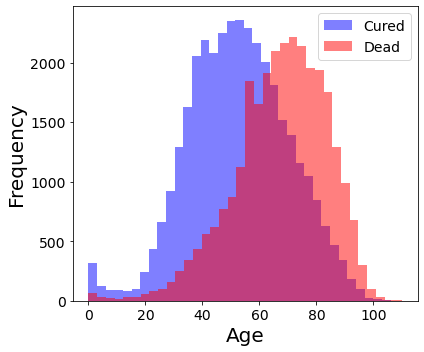

In [82]:
# removing outliers


print(min(df['NU_IDADE_N']))
print(max(df['NU_IDADE_N']))

# plotting graphic

plt.figure(figsize=(6,5))
plt.hist(df['NU_IDADE_N'][df['EVOLUCAO']==1], 35, color='blue', alpha=0.5, label ='Cured')
plt.hist(df['NU_IDADE_N'][df['EVOLUCAO']==2], 36, color='red' , alpha=0.5, label = 'Dead')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=14)
plt.xlabel('Age', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.tight_layout()
plt.savefig('age_distribution.pdf')
plt.show()